# Model Training
### 1.1 Import Data and Required Packages


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
!pip install scikit-learn
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

!pip install catboost
from catboost import CatBoostRegressor

!pip install xgboost
from xgboost import XGBRegressor
import warnings

### Import the CSV file

In [82]:
df = pd.read_csv('data/stud.csv')

In [83]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [84]:
X = df.drop(columns=['math_score'], axis=1) # this is my independent feature

X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [85]:
y = df['math_score']

In [86]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [87]:
# Create a column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [88]:
X = preprocessor.fit_transform(X)

In [89]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [90]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [91]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [101]:
models = {

     'Linear Regression': LinearRegression(),
     'Lasso': Lasso(),
     'Ridge': Ridge(),
     'K-Neighbors Regressor': KNeighborsRegressor(),
     'Decision tree': DecisionTreeRegressor(),
     'Random Forest Regressor': RandomForestRegressor(),
     'XGBRefressor': XGBRegressor(),
     'CatBoosting Regressor': CatBoostRegressor(verbose=False),
     'AdaBoost Regressor': AdaBoostRegressor()

}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)         #Train model

    # Make predications
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print('Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('R2 Score: {:.4f}'.format(model_train_r2))

    print('_________________________________________________')

    print('Model performance for test set')
    print('Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
Root Mean Squared Error: 5.3231
Mean Absolute Error: 4.2667
R2 Score: 0.8743
_________________________________________________
Model performance for test set
Root Mean Squared Error: 5.3940
Mean Absolute Error: 4.2148
R2 Score: 0.8804


Lasso
Model performance for training set
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R2 Score: 0.8071
_________________________________________________
Model performance for test set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 Score: 0.8253


Ridge
Model performance for training set
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.2650
R2 Score: 0.8743
_________________________________________________
Model performance for test set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 Score: 0.8806


K-Neighbors Regressor
Model performance for training set
Root Mean Squared Error: 5.7093
Mean Absolute Error: 4.5175
R2 Score: 0.8554
____________________

### Results

In [103]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854297
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.844979
6,XGBRefressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision tree,0.740916


### Linear Regression

In [104]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 88.04


#### Plot y_pred and y_test

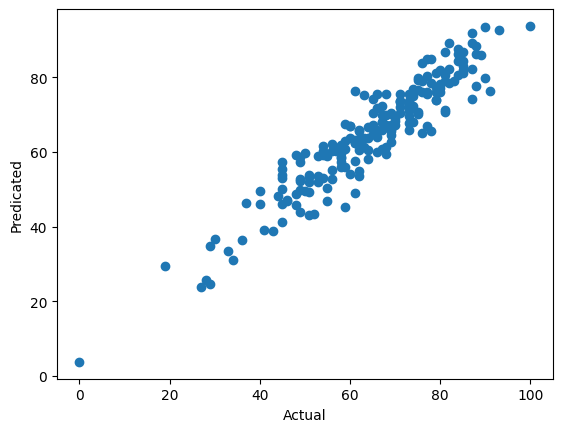

In [106]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual');
plt.ylabel('Predicated');

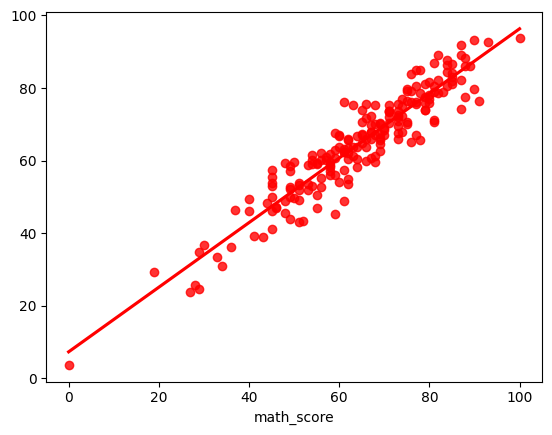

In [107]:
sns.regplot(x=y_test, y=y_pred, ci=None, color = 'red');


### Difference between Actual and Predicated Values

In [118]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicated Value': y_pred, 'Difference':y_test-y_pred})

pred_df

,Actual Value,Predicated Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
